# **Estadística Aplicada** #
## Andrea Carolina López Ruiz ##
**1902969 - Gpo:45**

In [2]:
# Importamos librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Librerias de supervivencia
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
from lifelines import ExponentialFitter
from lifelines import WeibullFitter

In [4]:
#importamos el archivo de base de datos
#solo insertamos el nombre del archivo, pero puede ser el path
datos = pd.read_excel('supervivencia_examenes.xlsx')

In [5]:
#imprimimos la base de datos que consta de 17 observaciones
datos.head(17)

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


## Descripción de las variables ##
**Observaciones:** 17 <br>
**total de tiempo para presentar el examen:** 2 horas (120 min)<br>
**id:** identificador de alumno<br>
**tiempo:** tiempo medido en min que tardaron en responder<br>
**examen:** 1 si entregó el examen, 0 sino lo entrego<br>
**calificación:** calificación obtenida<br>
**género:** m para masculino y f para femenino<br>

#### Objetivo del análisis
Queremos emplear un análisis de supervivencia ya que se tiene el tiempo en minutos desde que el profesor proporciona el exámen a los alumnos hasta que estos lo entregan, donde el evento a analizar es la propia entrega del exámen.

# 1. Estadísticas Descriptivas

Estadísticas  descriptivas. Calcule  el  tiempo  promedio  que  tardaron  en responder los alumnosel examen y la calificación promedio obtenida. El  profesor  sospecha  que  las  alumnas  responden  más  rápido  el  examen, calcule  el  tiempo  promedio  que  tardaron  en  responder  las  alumnas  y  su calificación  promedio,  asi  como  el  tiempo  promedio  que  tardaron  en responder los alumnos y su calificación promedio.Elabore un print mostrando dichos resultados

In [6]:
#obtenemos Estadística Descriptiva del grupo entero
datos.describe()

,id,tiempo,examen,calificación
count,17.000000,17.000000,17.0,17.000000
mean,9.000000,107.352941,1.0,90.705882
std,5.049752,11.241337,0.0,9.642126
min,1.000000,85.000000,1.0,72.000000
25%,5.000000,103.000000,1.0,84.000000
50%,9.000000,109.000000,1.0,96.000000
75%,13.000000,116.000000,1.0,98.000000
max,17.000000,120.000000,1.0,100.000000


### Promedios grupo entero 

In [7]:
#futuro error: tenemos que poner la selección de datos antes
prom_tiempo = datos['tiempo'].mean()
print("El promedio de tiempo que tardaron para responder el examen es:",prom_tiempo)

El promedio de tiempo que tardaron para responder el examen es: 107.3529411764706


In [8]:
#futuro error: tenemos que poner la selección de datos antes
prom_calif = datos['calificación'].mean()
print("El promedio de la calificación obtenida es:",prom_calif)

El promedio de la calificación obtenida es: 90.70588235294117


In [9]:
datos.describe()

,id,tiempo,examen,calificación
count,17.000000,17.000000,17.0,17.000000
mean,9.000000,107.352941,1.0,90.705882
std,5.049752,11.241337,0.0,9.642126
min,1.000000,85.000000,1.0,72.000000
25%,5.000000,103.000000,1.0,84.000000
50%,9.000000,109.000000,1.0,96.000000
75%,13.000000,116.000000,1.0,98.000000
max,17.000000,120.000000,1.0,100.000000


El **tiempo promedio** para responder el examen es: 107.35 <br>
La **calificación promedio** obtenida del grupo es: 90.70

### Promedios por género

In [10]:
#agrupamos por género y obtenemos el promedio de tiempo y calificación
datos.groupby('género').mean()

,id,tiempo,examen,calificación
género,,,,
f,8.750000,108.125000,1.0,93.000000
m,9.222222,106.666667,1.0,88.666667


#### Alumnas

In [11]:
femenino = datos.query('género == "f"')
femenino.describe()

,id,tiempo,examen,calificación
count,8.000000,8.000000,8.0,8.000000
mean,8.750000,108.125000,1.0,93.000000
std,3.615443,10.162079,0.0,7.329003
min,4.000000,90.000000,1.0,78.000000
25%,6.500000,104.250000,1.0,92.000000
50%,8.500000,108.000000,1.0,96.000000
75%,10.500000,116.000000,1.0,96.500000
max,15.000000,120.000000,1.0,100.000000


El **tiempo promedio** para responder el examen es: 108.12 <br>
La **calificación promedio** obtenida del grupo es: 93.00

#### Alumnos

In [12]:
masculino = datos. query('género == "m"')
masculino.describe()

,id,tiempo,examen,calificación
count,9.000000,9.000000,9.0,9.000000
mean,9.222222,106.666667,1.0,88.666667
std,6.280481,12.698425,0.0,11.357817
min,1.000000,85.000000,1.0,72.000000
25%,3.000000,103.000000,1.0,82.000000
50%,11.000000,111.000000,1.0,88.000000
75%,14.000000,116.000000,1.0,100.000000
max,17.000000,119.000000,1.0,100.000000


El **tiempo promedio** para responder el examen es: 106.66 <br>
La **calificación promedio** obtenida del grupo es: 88.66

## 2. Comportamiento del riesgo
¿Cómo  crees  que  se  comporta  el  riesgo  de  entregar  el  examen  conforme transcurre  el  tiempo?Las alumnas tardaron más tiempo en resolver el exámen pero obtuvieron mejor promedio, mientras que los alumnos tardaron menor tiempo, pero con promedio de calificación más baja <br>¿es constante,  creciente,  o  decreciente? el riesgo es creciente <br>Según  tu respuesta  ajusta  un  modelo  exponencial  o  Weibull,  primero  para  todos  los individuos y muestra la función de riesgo.

#### Modelo exponencial o de Weibull

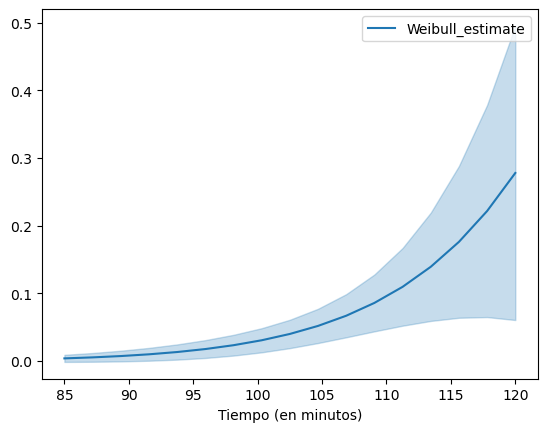

In [13]:
#Realizamos el modelo de weibull y graficamos la función de riesgo
weibgpo = WeibullFitter().fit(datos['tiempo'], datos ['examen'])
weibgpo.plot_hazard()
plt.xlabel('Tiempo (en minutos)')
plt.show()

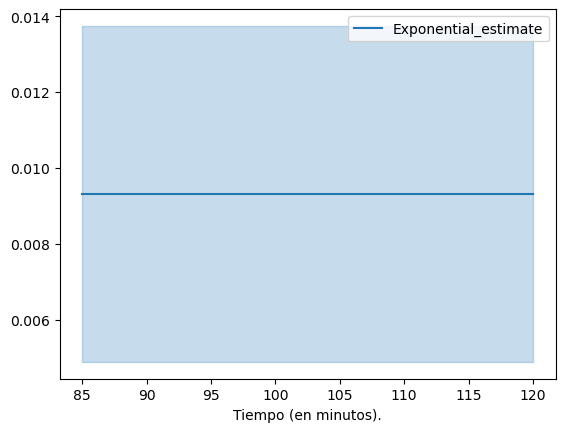

In [14]:
#Realizamos el modelo de exponencial y graficamos la función de riesgo
expgpo = ExponentialFitter().fit(datos['tiempo'], datos['examen'])
expgpo.plot_hazard()
plt.xlabel('Tiempo (en minutos).')
plt.show()

In [15]:
#verificamos el criterio de Akaike
weibgpo.AIC_.round(), expgpo.AIC_.round()

(130.0, 195.0)

Nos quedamos con el modelo de Weibull ya que tiene menor criterio de Akaike

## 3. Estimación de modelo

Ahora estima el mismo modelo que planteaste en el inciso anterior, pero para hombres  y  mujeres,  y  grafica  ambas  funciones  de  supervivencia  juntas (empalmadas), ¿gráficamente quien tarda más en entregar el examen?

#### Gráfica de funciones de supervivencia (empalmadas)

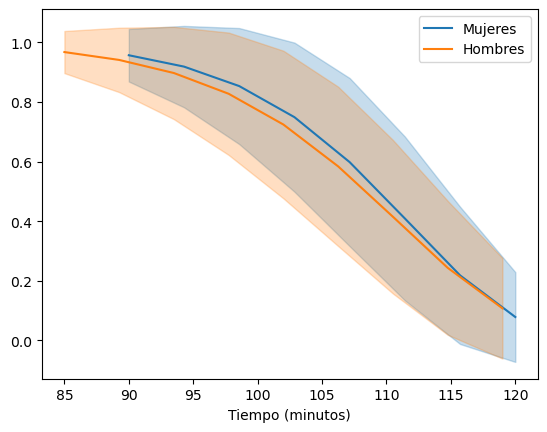

In [16]:
weibFemenino = WeibullFitter().fit (femenino ['tiempo'], femenino['examen'])
weibMasculino = WeibullFitter().fit (masculino ['tiempo'], masculino['examen'])
weibFemenino.plot_survival_function(label ='Mujeres')
weibMasculino.plot_survival_function(label ='Hombres')
plt.xlabel ('Tiempo (minutos)')
plt.show()

Observando la gráfica podemos ver que las alumnas tardan más en entregar el examen

## 4. Estime  la  función  de  supervivencia del  tiempo  de  entrega del  examen

Estime  la  función  de  supervivencia del  tiempo  de  entrega del  examen  de todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función de supervivencia, los valores del intervalo de confianza al 95%, asi como la gráfica respectiva de la función de supervivencia con sus intervalos.

#### Gráfica

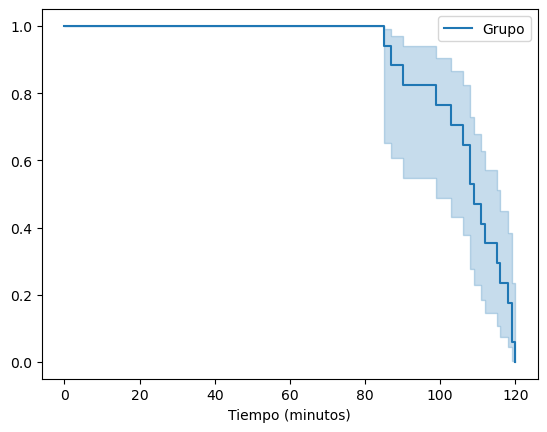

In [17]:
kmgpo = KaplanMeierFitter().fit(datos['tiempo'], datos['examen'])
kmgpo.plot_survival_function(label = 'Grupo')
plt.xlabel('Tiempo (minutos)')
plt.show()

#### Valores de la Función de Supervivencia

In [18]:
kmgpo.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


#### Valores del intervalo de confianza

In [20]:
#Obtenemos los valores del intervalo de confianza
kmgpo.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


## 5. Función de Supervivencia Hombres y Mujeres

Realice  un  gráfico  donde  muestre  la  función  de  supervivencia de  Kaplan-Meier de los alumnos(m) y de las alumnas(f) con sus respectivos intervalos de confianza. Y comente con base en la gráfica si es posible que el profesor tenga razón respecto a que las alumnas responden más rápido el examen

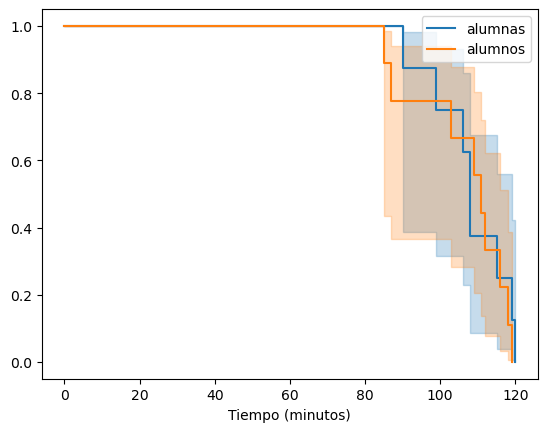

In [19]:
kmFemenino = KaplanMeierFitter().fit(femenino['tiempo'], femenino['examen'])
kmMasculino = KaplanMeierFitter().fit(masculino['tiempo'], masculino['examen'])

#Graficamos la funcion de supervivencia
kmFemenino.plot_survival_function(label="alumnas")
kmMasculino.plot_survival_function(label="alumnos")
plt.xlabel("Tiempo (minutos)")
plt.show()

Observamos que los alumnos son quienes responden el examen más rápido por lo que la hipótesis del profesor es incorrecta.

## 6. Log Rank Test

Realice  el  log  ranktest  para  probar  si  las  funciones  de  supervivencia  de alumnos  y  alumnas  para  responder  el  examen  son  iguales.  Comente  el resultado de la prueba de hipótesis y diga si el profesor tiene razón o no 

In [20]:
lrt = logrank_test(femenino['tiempo'], masculino['tiempo'],
                  femenino['examen'], masculino['examen'])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

Ho: funciones de supervivencia = <br>
Ha: funciones de supervivencia $\neq$

p-valor< $\alpha$ -> Rechazamos H0<br>
0.69<0.05 $\therefore$No Rechazamos H0<br>
$\Rightarrow$ A un 95% de confianza no rechazamos h0 y entonces *las funciones de supervivencia son iguales* 

## 7. Modelo de Cox

El profesor tambien sospecha que quienes entregan el examen más rápido es porque  no  estudiaron,  por  tanto no  saben  que  responder y entregan  el examen casi inmediatamente. Estime  un  modelo  de  cox de  riesgos  proporcionales  donde  utilice  como variables  explicativas  el  género  y  la  calificación  obtenida,  para  explicar  la función de riesgo de entregar el examen.

In [21]:
#Cambiamos identificadores
datoscph = datos.copy()
datoscph['género']= datoscph['género'].map({'m':0,'f':1})

In [22]:
cph = CoxPHFitter().fit(datoscph, 'tiempo','examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-16 20:55:22 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género        -0.50       0.60       0.80            -2.08             1.07                 0.13                 2.91

               cmp to     z    p   -log2(p)
covariate                                  
id               0.00  0.42 0.67       0.57
calificación     0.00  0.47 0.64       0.64
género           0.00 -0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

## 8. Interpretación de resultados

<AxesSubplot:xlabel='log(HR) (95% CI)'>

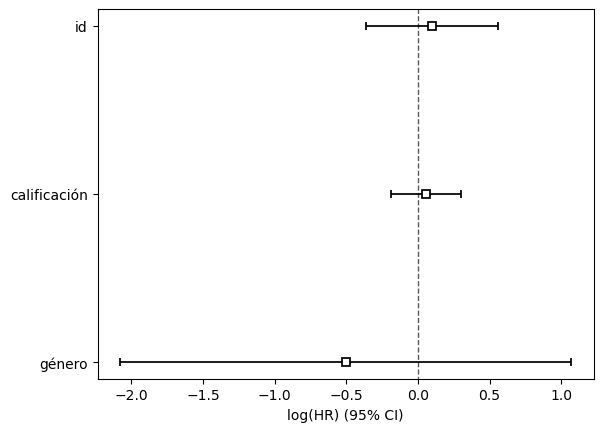

In [23]:
cph.plot()

**Prueba de Hipótesis.**<br>
**Ho:** Bi = 0<br>
**H1:** Bi $\neq$ 0<br>
 p-value < $\alpha$ (.05) ->  Se rechaza Ho.
 
 **p-value de calificación** = 0.64$>\alpha$, $\therefore$No rechazamos H0  <br> 
 **p-value de género** = 0.53$>\alpha$, $\therefore$No rechazamos H0 <br>

Las variables no son explicativas para el modelo porque no rechazamos H0, por lo tanto estas variables se vuelven 0, lo cual hace que no sumen en el modelo.

## 9. Funciones de Supervivencia de alumnas y alumnos con Modelo de Cox

Utilice cph.plot_partial_effects_on_outcome(covariates='variable', values=[0,1]) para  estimar  las  funciones  de  supervivencia  de  alumnos  y alumnas  de  acuerdo  con  el  modelo  de  cox  ¿obtiene  resultados  similares  al inciso  d,  es  decir,  coincide  con  las  funciones  de  supervivencia de  Kaplan-Meier?

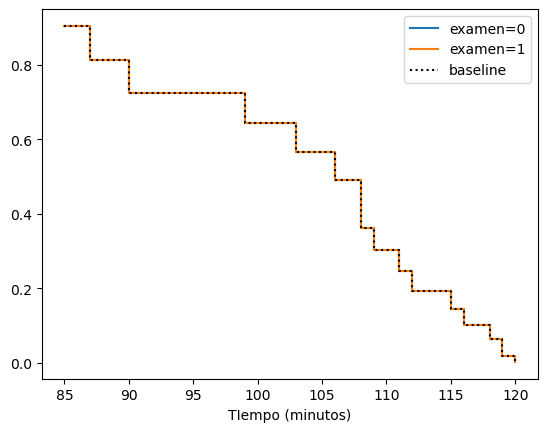

In [24]:
cph.plot_partial_effects_on_outcome(covariates='examen', values=[0,1])
plt.xlabel("TIempo (minutos)")
plt.show()

Si, coincide con el inciso d

## 10. Interpretación de resultados finales

Por último, con base en la interpretación del modelo de cox y la significancia de los coeficientes,  comente  si  el  profesor  tiene  razón  al  señalar  que  las alumnas  responden  en  menor  tiempo  el  examen,  y  si  el  profesor  también tiene razón al señalar que los que entregan el examen rápido no estudiaron y por tanto obtienen menor calificación.

<b>Evento a evaluar:</b> Entregar el examen<br>
****
<b>Significancia de los coeficientes:</b> <br>
<b>Si coef < 0</b> = 1-exp(coef)<br>
<b>Si coef > 0</b> = exp(coef)-1<br>
<br>
    <b> Variable: calificación</b> <br> 
    exp(coef)-1 = exp(0.06)-1 = 1.06-1 = 0.06<br>
 <br>
    <b> Variable: género</b> <br> 
    1-exp(coef) = 1-exp(-0.50)= 1 - 0.60 = 0.40<br>
****
El profesor no tiene razón al señalar que las alumnas responden en menor tiempo el examen ya que el promedio de entrega de los varones es mayor al de las mujeres.
****
El profesor tiene razón al decir que los alumnos que entregaron en menor tiempo su examen tienen menor calificación ya que el promedio de entrega de los varones es menor al de las mujeres y ellos obtuvieron menor promedio de calificación